In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

REGRESSION MODEL ON PROPERTY PRICE TRAIN

In [3]:
prop = pd.read_csv(r'D:\datasets\Property_Price_Train.csv')

In [4]:
prop.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
prop.shape

(1459, 81)

PRE PROCESSING

In [6]:
prop.isnull().sum()[prop.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [7]:
prop = prop.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis =1)


#more than 50% nulls

In [8]:
# FILLING NULLS
prop.Lot_Extent = prop.Lot_Extent.fillna(prop.Lot_Extent.median())

prop.Brick_Veneer_Type = prop.Brick_Veneer_Type.fillna('None')
prop.Brick_Veneer_Area = prop.Brick_Veneer_Area.fillna(0)
prop.Basement_Height = prop.Basement_Height.fillna('none')
prop.Basement_Condition= prop.Basement_Condition.fillna('none')
prop.Exposure_Level = prop.Exposure_Level.fillna('No')
prop.BsmtFinType1 = prop.BsmtFinType1.fillna('None')
prop.BsmtFinType2 = prop.BsmtFinType2.fillna('None')
prop.Electrical_System = prop.Electrical_System.fillna('SBrkr')

prop.Garage = prop.Garage.fillna('NoGrg')
prop.Garage_Built_Year = prop.Garage_Built_Year.fillna(2005)
prop.Garage_Finish_Year = prop.Garage_Finish_Year.fillna('Unf')
prop.Garage_Quality = prop.Garage_Quality.fillna('TA')
prop.Garage_Condition = prop.Garage_Condition.fillna('TA')


In [9]:
prop.isnull().sum()[prop.isnull().sum()>0] 

Series([], dtype: int64)

In [10]:
prop.columns[prop.dtypes == 'object']


Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [11]:
prop.Property_Shape.replace({'Reg':0,'IR1':1,'IR2':2,'IR3':3},inplace = True)     #Ordinal Data

In [12]:
prop[prop.select_dtypes(include = 'object').columns] =prop[prop.select_dtypes(include = 'object').columns].apply(le.fit_transform)
#non-numeric to numeric

In [13]:
prop.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,0,3,0,4,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,0,2,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,3,0,4,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,3,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,3,0,2,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [14]:
prop = prop.drop(['Id'],axis = 1)          #unique value column

In [15]:
prop.head(3)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,0,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500


In [16]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])

In [17]:
#removing Outliers

remove_outliers(prop,  'Sale_Price', 2  )

(1396, 75)
Number of outliers removed == > 63


In [18]:
prop = df1

##### if correlation b/w a x column and y variable is close to zero then there is no point using that column for model building

In [19]:
prop.iloc[:,0:-1].columns   # X variables

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',


In [20]:
x_col =prop.iloc[:,0:-1].columns

In [21]:
cor_list = []
for col in x_col:
    cor_list.append(prop.Sale_Price.corr(prop[col]))

In [22]:
cols_corr =pd.DataFrame()
cols_corr['Columns'] = x_col
cols_corr['corelation'] = cor_list

In [23]:
df2 =cols_corr[(cols_corr.corelation < -.3) | (cols_corr.corelation>.3) ]

In [24]:
l1 = list(df2.Columns)


In [25]:
len(l1)

20

In [26]:
l1.append('Sale_Price')

In [27]:
prop1 = prop.loc[:,l1] 

In [28]:
prop1.shape

(1396, 21)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

RANDOM SAMPLING

In [30]:
prop_x = prop1.iloc[:,0:-1]
prop_y=prop1.iloc[:,-1]

In [31]:
scaled_x = pd.DataFrame(scaler.fit_transform(prop_x),columns=prop_x.columns)

In [32]:
scaled_x.head()

,Overall_Material,Construction_Year,Remodel_Year,Brick_Veneer_Area,Exterior_Material,Foundation_Type,Basement_Height,Total_Basement_Area,Heating_Quality,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Full_Bathroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size
0,0.795399,1.098385,0.917421,0.673141,-0.998902,0.802392,-0.467908,-0.411662,-0.914471,-0.771594,1.231471,0.494015,0.859580,-0.542826,1.025470,-0.922812,-0.777862,0.968472,-0.339953,0.392568
1,0.014543,0.198613,-0.389535,-0.564467,0.661178,-0.507712,-0.467908,0.586017,-0.914471,0.364624,-0.797804,-0.440455,0.859580,0.788957,-0.268885,0.659799,-0.777862,-0.122655,-0.339953,0.392568
2,0.795399,1.031735,0.869016,0.458454,-0.998902,0.802392,-0.467908,-0.254393,-0.914471,-0.592486,1.259986,0.652542,0.859580,-0.542826,-0.268885,0.659799,-0.777862,0.887648,-0.339953,0.392568
3,0.795399,-1.834206,-0.679969,-0.564467,0.661178,-1.817816,0.757607,-0.657396,0.230463,-0.477745,0.998604,0.508616,-1.006631,-0.542826,0.378293,0.659799,1.262336,0.766412,0.915534,1.779974
4,1.576255,0.998410,0.772204,1.645547,-0.998902,0.802392,-0.467908,0.298509,-0.914471,0.037191,1.704335,1.511921,0.859580,-0.542826,1.672648,0.659799,-0.777862,0.847236,-0.339953,1.779974


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
prop_train_x,prop_test_x,prop_train_y,prop_test_y = train_test_split(scaled_x,prop_y,test_size = .2)  

In [35]:
prop_train_y.head(3)

948     192500
593     140000
1116    184100
Name: Sale_Price, dtype: int64

In [36]:
prop_test_x.shape

(280, 20)

MODEL BUILDING

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [38]:
linreg.fit(prop_train_x,prop_train_y)

LinearRegression()

In [39]:
pred = linreg.predict(prop_test_x)

In [40]:
pred

array([114719.95172357, 129233.68232264, 186161.52503416, 125895.2851228 ,
       268363.63563389, 119987.6074943 , 156053.2367395 , 162756.81254731,
       190547.72902529, 126648.42319041, 125845.60618176, 130525.35269384,
       126372.66736131, 171017.03594689,  93288.35380815, 122863.59170766,
       175619.23868563, 186610.95665588, 178306.67094157, 112426.30712565,
       194764.85647134, 136699.36203787, 158932.04469256, 159446.5099771 ,
       135272.3627144 , 105416.71336613, 107804.82792445, 133956.0930508 ,
       128150.63558434, 154561.46222658, 224403.01547411, 208239.24816945,
       188810.97802835, 237643.44722294, 183513.58940766, 118862.57555497,
       117066.77466369, 127222.95025136, 173851.38922527, 118212.19824584,
       165216.68786606, 186780.81683355, 154863.45499283, 116773.91049288,
       151959.52901836, 156044.50773336, 132438.44222256, 127972.64014528,
       163035.70311704, 227532.69679234, 185717.92857782, 167491.41189397,
       113747.72520024, 1

In [41]:
len(pred)

280

In [42]:
linreg.intercept_          #Bo

170186.1994301719

In [43]:
linreg.coef_              #Bn

array([14965.84666712,  4927.48528568,  5467.76752854,   765.34647959,
       -1868.30697797,   721.56089155, -2263.92391442,  3821.53784296,
       -1418.18030652, 14417.85732196, 13189.55375971,    41.47683701,
        -839.16541438, -4781.22574944,   832.5758852 ,  5764.34947475,
       -2157.86218331,  -168.30663343, -2448.1951625 ,  8759.94294615])

In [44]:
Rsqr = linreg.score(prop_train_x,prop_train_y)
print('Rsqr:', Rsqr)           #range 0-1  (higher the better)

Rsqr: 0.8131772137695161


In [45]:
N = prop_train_x.shape[0]
K = prop_train_x.shape[1]

AdRsqr = 1-((1-Rsqr)*(N-1)/(N-K-1))
print('AdRsqr:', AdRsqr)             #range 0-Rsqr   (higher,better)

AdRsqr: 0.8097649254365393


In [46]:
pred_train = linreg.predict(prop_train_x)

In [76]:
err_train = prop_train_y - pred_train

In [48]:
np.mean(err_train)          #should be zero

1.2504737189967572e-11

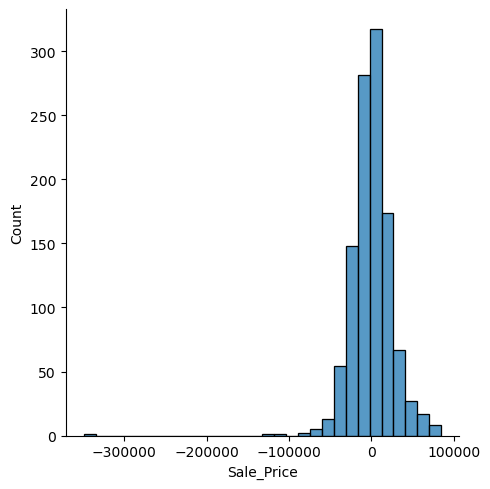

In [49]:
sns.displot(err_train,bins = 30);  
plt.show()                                   #errors are normally distributed

In [50]:
err_train.kurtosis()      #for normal dist kurt = value+3
# normal dist  (k = 0)

32.369867007408764

In [51]:
27.510530133342808 + 3

30.510530133342808

In [52]:
err_train.skew()          #skew should be zero

-2.2083279692049063

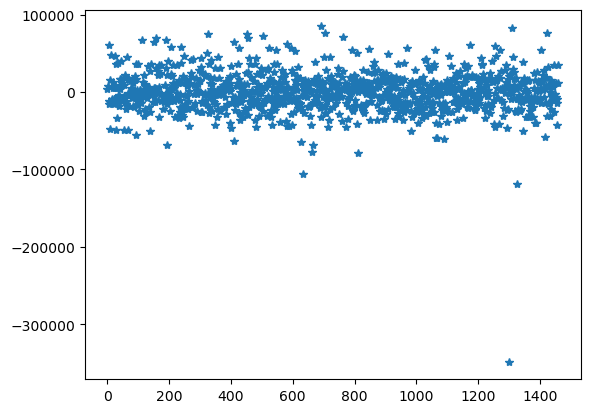

In [53]:
plt.plot(err_train,'*')
plt.show()                          #there is no pattern in errors

In [54]:
pred_actual = pd.DataFrame()

In [55]:
pred_actual['Actual'] = prop_train_y
pred_actual['Predicted'] = pred_train

In [56]:
pred_actual.head()

,Actual,Predicted
948,192500,216052.028649
593,140000,168030.236227
1116,184100,210322.454139
280,228500,219432.491956
891,172500,175918.137024


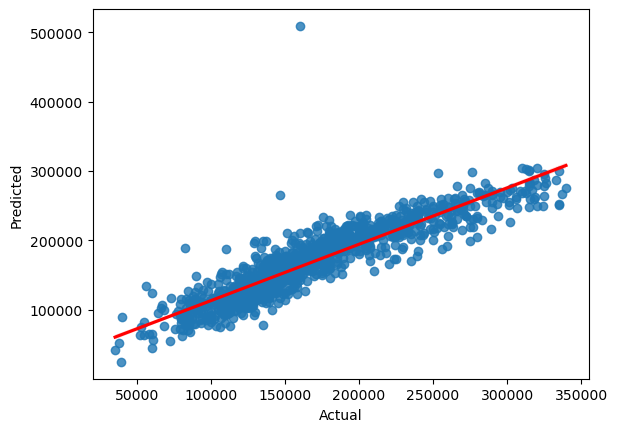

In [57]:

sns.regplot(x='Actual', y='Predicted', data=pred_actual, line_kws={'color': 'red'})
plt.show()


In [58]:
pred_test = linreg.predict(prop_test_x)
err_test = prop_test_y - pred_test

MSE = np.mean(np.square(err_test))
print('MSE:', MSE)


RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)


MAPE = np.mean(np.abs(err_test*100/prop_test_y))
print('MAPE:', MAPE)

MAE = np.mean(np.abs(err_test))
print('MAE:', MAE)

MSE: 877391572.692715
RMSE: 29620.796287282945
MAPE: 13.232348435898272
MAE: 20788.59500038969


In [59]:
mse = np.mean(np.square(err_train))
print('MSE:', mse)


rmse = np.sqrt(mse)
print('RMSE:',rmse)


mape = np.mean(np.abs(err_train*100/prop_train_y))
print('MAPE:', mape)

mae = np.mean(np.abs(err_train))
print('MAE:', mae)

MSE: 646119779.0282437
RMSE: 25418.886266479964
MAPE: 11.423610714068484
MAE: 17702.35973238713


In [60]:
err_train.max()

84605.61476873644

In [61]:
features_coef = pd.DataFrame()
features_coef['features'] = prop_train_x.columns
features_coef['slope'] = linreg.coef_

In [62]:
features_coef.head()

,features,slope
0,Overall_Material,14965.846667
1,Construction_Year,4927.485286
2,Remodel_Year,5467.767529
3,Brick_Veneer_Area,765.346480
4,Exterior_Material,-1868.306978


## Ridge, Lasso & ElasticNet

In [63]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
rdg = Ridge()
las = Lasso()
elnet = ElasticNet()

In [64]:
rdg.fit(prop_train_x,prop_train_y)

Ridge()

In [65]:
predtest_rdg = rdg.predict(prop_test_x)
predtrain_rdg = rdg.predict(prop_train_x)
err_train_rdg = prop_train_y-predtrain_rdg
err_test_rdg = prop_test_y - predtest_rdg

In [66]:
Rsqr_rdg = rdg.score(prop_train_x,prop_train_y)

AdRsqr_rdg = 1-((1-Rsqr_rdg)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_rdg )
print('AdRsqr for train data:', AdRsqr_rdg)

Rsquare for train data: 0.8131681564855059
AdRsqr for train data: 0.809755702722684


In [67]:
print('MSE for train data:',np.mean(np.square(err_train_rdg)) )
print('MSE for test data:',np.mean(np.square(err_test_rdg)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_rdg))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_rdg))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_rdg*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_rdg*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_rdg)) )
print('MAE for test data:',np.mean(np.abs(err_test_rdg)))

MSE for train data: 646151103.3140087
MSE for test data: 876978157.0304061


RMSE for train data: 25419.50242066136
RMSE for test data: 29613.81699528796


MAPE for train data: 11.424256488672773
MAPE for test data: 13.22195958675222


MAE for train data: 17707.41934044291
MAE for test data: 20773.52050362995


## Lasso

In [68]:
las.fit(prop_train_x,prop_train_y)

Lasso()

In [69]:
predtest_las = las.predict(prop_test_x)
predtrain_las = las.predict(prop_train_x)
err_train_las = prop_train_y-predtrain_las
err_test_las = prop_test_y - predtest_las

In [70]:
Rsqr_las = las.score(prop_train_x,prop_train_y)

AdRsqr_las = 1-((1-Rsqr_las)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_las)
print('AdRsqr for train data:', AdRsqr_las)

Rsquare for train data: 0.8131771939024008
AdRsqr for train data: 0.8097649052065543


In [71]:
print('MSE for train data:',np.mean(np.square(err_train_las)) )
print('MSE for test data:',np.mean(np.square(err_test_las)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_las))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_las))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_las*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_las*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_las)) )
print('MAE for test data:',np.mean(np.abs(err_test_las)))

MSE for train data: 646119847.7379354
MSE for test data: 877387528.5736583


RMSE for train data: 25418.887618027966
RMSE for test data: 29620.728022343716


MAPE for train data: 11.42361869777996
MAPE for test data: 13.23228399258283


MAE for train data: 17702.630333408077
MAE for test data: 20788.49272798711


## ELASTICNET

In [72]:
elnet.fit(prop_train_x,prop_train_y)

ElasticNet()

In [73]:
predtest_EN = elnet.predict(prop_test_x)
predtrain_EN = elnet.predict(prop_train_x)
err_train_EN = prop_train_y-predtrain_EN
err_test_EN = prop_test_y - predtest_EN

In [74]:
Rsqr_EN = elnet.score(prop_train_x,prop_train_y)

AdRsqr_EN= 1-((1-Rsqr_EN)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_EN)
print('AdRsqr for train data:', AdRsqr_EN)

Rsquare for train data: 0.8018254517077283
AdRsqr for train data: 0.7982058252549015


In [75]:
print('MSE for train data:',np.mean(np.square(err_train_EN)) )
print('MSE for test data:',np.mean(np.square(err_test_EN)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_EN))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_EN))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_EN*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_EN*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_EN)) )
print('MAE for test data:',np.mean(np.abs(err_test_EN)))

MSE for train data: 685379433.286342
MSE for test data: 899052048.5465467


RMSE for train data: 26179.75235341889
RMSE for test data: 29984.196646676173


MAPE for train data: 11.741279428823287
MAPE for test data: 13.46658616110208


MAE for train data: 18269.89892642973
MAE for test data: 21194.32760335636


##### Linear regression, Ridge regression, Lasso regression, and ElasticNet are all techniques used in regression analysis, which is a method for modeling the relationship between a dependent variable and one or more independent variables.
The main difference between these techniques is in how they handle the issue of overfitting, which is when a model is too complex and fits the training data too closely, leading to poor generalization performance on new data.


Linear regression: This is the most basic form of regression, where a linear relationship is assumed between the independent variables and the dependent variable. The goal is to find the coefficients that best fit the data, based on the ordinary least squares (OLS) method. However, this method does not take into account the issue of overfitting.
    
Ridge regression: This method adds a regularization term to the OLS method, which penalizes large coefficients and shrinks them towards zero. This helps to reduce the variance of the model and improve its generalization performance. Ridge regression works well when there are many correlated variables in the dataset.
    
Lasso regression: This method also adds a regularization term to the OLS method, but it uses the L1 norm instead of the L2 norm used by Ridge regression. The L1 norm shrinks some coefficients to exactly zero, effectively performing feature selection and producing a more interpretable model. Lasso regression works well when there are many irrelevant variables in the dataset.
    
ElasticNet: This method combines the L1 and L2 norms in the regularization term, allowing for both feature selection and coefficient shrinkage. This makes it a more flexible method that works well when there are both correlated and irrelevant variables in the dataset.

In summary, Linear regression is the most basic method that does not take into account the issue of overfitting, Ridge regression reduces the variance of the model by penalizing large coefficients, Lasso regression performs feature selection by shrinking some coefficients to exactly zero, and ElasticNet combines the L1 and L2 norms to provide a more flexible method.


## Conclusion

###### Based on the regression algorithms used in the model, it appears that they are providing similar results. However, when implementing Lasso regularization (L1), the model is able to prevent overfitting by shrinking some of the coefficients to zero. This selective coefficient shrinkage improves the model's ability to predict the sale price of properties with greater accuracy, achieving around 80% or higher. Therefore, the Lasso regularization technique has been utilized to optimize the predictive accuracy of the model.